In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import glob

In [14]:
caminho = './CSV/'
arquivos = glob.glob(caminho + '*.csv')

In [15]:
dataframes = []
verificacao = []
for arquivo in arquivos:
    dados = pd.read_csv(arquivo)
    dataframes.append(dados)
    verificacao.append(dados.shape)
    print(dados.shape[1], end=' ')

Dando inicio ao tratamento de dados foi utilizado a biblioteca "glob" que me permitiu trazer vários arquivos de determinada extensão para uma varíavel chamada `arquivos`, que por sua vez teria de passar por um looping dentro dos arquivos presentes da sua varíavel designada. Isso permitiu que cada um dos itens dentro de `arquivos` fosse colocado num `append` que levaria a uma lista vazia chamada **`dataframe`**, e ainda por cima foi criada outra lista vazia chamada `verificacao` que teria como função capturar dados da função `shape` dentro da variavel `arquivos`.

Após passar por toda essas funções realizaremos a mostragem de todos estes dados e consequentemente sua soma para vermos se temos uma quantia igual de colunas, linhas e outros dados.
Contudo, devo ressaltar que a verificação das colunas foi feita na celula de código acima, dando a entender que todos os arquivos possuem ao todo **5** colunas.

In [16]:
verificacao_final = sum(verificar[0] for verificar in verificacao)
print(f'Neste DATAFRAME iremos trabalhar com um total de {verificacao_final} linhas')
print(f'E temos um total de {verificacao[0]} colunas em todos estes DATAFRAMES.')

Neste DATAFRAME iremos trabalhar com um total de 0 linhas


IndexError: list index out of range

In [ ]:
print(f'Temos ao todo {len(dataframes)} arquivos dentro da lista vazia que foi criada anteriormente')
dados_principais = pd.concat(dataframes)
dados_principais

Temos ao todo 14 arquivos dentro da lista vazia que foi criada anteriormente


,ano,uf,genero,mes,numero
0,2019,Rondônia,Masculino,Janeiro,0
1,2019,Rondônia,Masculino,Fevereiro,4
2,2019,Rondônia,Masculino,Março,1
3,2019,Rondônia,Masculino,Abril,0
4,2019,Rondônia,Masculino,Maio,0
...,...,...,...,...,...
319,2021,Distrito Federal,Feminino,Agosto,12
320,2021,Distrito Federal,Feminino,Setembro,13
321,2021,Distrito Federal,Feminino,Outubro,15
322,2021,Distrito Federal,Feminino,Novembro,20


Após as verificações de quantia de linhas e colunas e de toda a concatenação destes arquivos, passaremos para a verificação de alguns fatores internos do próprio **DATAFRAME** que será trabalhado, assim teremos noção se há alguma quantia de valores nulos presentes em nosso **DATAFRAME**, valores escritos da maneira errada ou de outras formas, isso nos permitirá trabalhar com mais clareza e também fará com que a análise traga dados o mais próximos da realidade.

In [ ]:
dados_principais.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4536 entries, 0 to 323
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ano     4536 non-null   int64 
 1   uf      4536 non-null   object
 2   genero  4536 non-null   object
 3   mes     4536 non-null   object
 4   numero  4536 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 212.6+ KB


In [ ]:
genero = dados_principais['genero'].unique()
uf = dados_principais['uf'].unique()
ano = dados_principais['ano'].unique()
mes = dados_principais['mes'].unique()

print(f'''
Os valores únicos da coluna genero são: {genero}

Os valores únicos da coluna ano são: \n{ano}

Os valores únicos da coluna mes são: \n{mes}

Os valores únicos da coluna uf são: \n{uf}''')


Os valores únicos da coluna genero são: ['Masculino' 'Feminino']

Os valores únicos da coluna ano são: 
[2019 2015 2016 2017 2018 2020 2021]

Os valores únicos da coluna mes são: 
['Janeiro' 'Fevereiro' 'Março' 'Abril' 'Maio' 'Junho' 'Julho' 'Agosto'
 'Setembro' 'Outubro' 'Novembro' 'Dezembro']

Os valores únicos da coluna uf são: 
['Rondônia' 'Acre' 'Amazonas' 'Roraima' 'Pará' 'Amapá' 'Tocantins'
 'Maranhão' 'Piauí' 'Ceará' 'Rio Grande do Norte' 'Paraíba' 'Pernambuco'
 'Alagoas' 'Sergipe' 'Bahia' 'Minas Gerais' 'Espírito Santo'
 'Rio de Janeiro' 'São Paulo' 'Paraná' 'Santa Catarina'
 'Rio Grande do Sul' 'Mato Grosso do Sul' 'Mato Grosso' 'Goiás'
 'Distrito Federal']


Graças a função `info()` percebemos que nenhum dos tipos de dados estão incorretos, pois o **mês** e o **ano** estão separados um do outro, fazendo com que os dados acabem não podendo ser convertidos para datetime por conta da síntaxe do Pandas apenas permitir a conversão quando há o formato correto para dados do tipo **DATETIME**, como no exemplo do formato que será mostrado após esta palavra: `["%Y, %m, %d"]`. Então, após obter essas informações também descobrimos que nenhuma das colunas presentes no nosso **DATAFRAME** possuem valores nulos, o que facilitará mais ainda o nosso trabalho no momento das criações dos gráficos.

Contudo, ainda precisamos verificar os valores únicos da nossa tabela em busca dos dados considerados contínuos para visualizar possíveis dados que podem acabar sendo inseridos de maneira errada ou distinta, afinal de contas a função `unique` irá realizar a distinção destes dados pela menor distinção possível, desde mínusculas a acentos. E após obtermos os resultados percebemos que não temos dados diferentes nem nada do tipo, podendo agora partir para a análise exploratória dos dados em questão.

Inicialmente é necessário relembrar que estamos buscando os três estados com o maior número de casamentos no ano de 2021 para realizar uma previsão que permitirá-nos mostrar quantos casamentos ocorrerão nos dois anos seguintes. Contudo, antes de chegar a este ponto utilizaremos alguns gráficos para buscar insights interessantes que poderão agregar a empresa solicitante para que a mesma possa buscar possíveis medidas de melhoria para determinados estados a depender dos resultados.

Então para começar a análise de dados iremos observar como se deu a evolução dos casamentos homossexuais ao longo dos anos para todos os estados.

<Axes: title={'center': 'Evolução do número de casamentos ao longo dos anos'}, xlabel='Progressão Anual', ylabel='Número de Casamentos'>

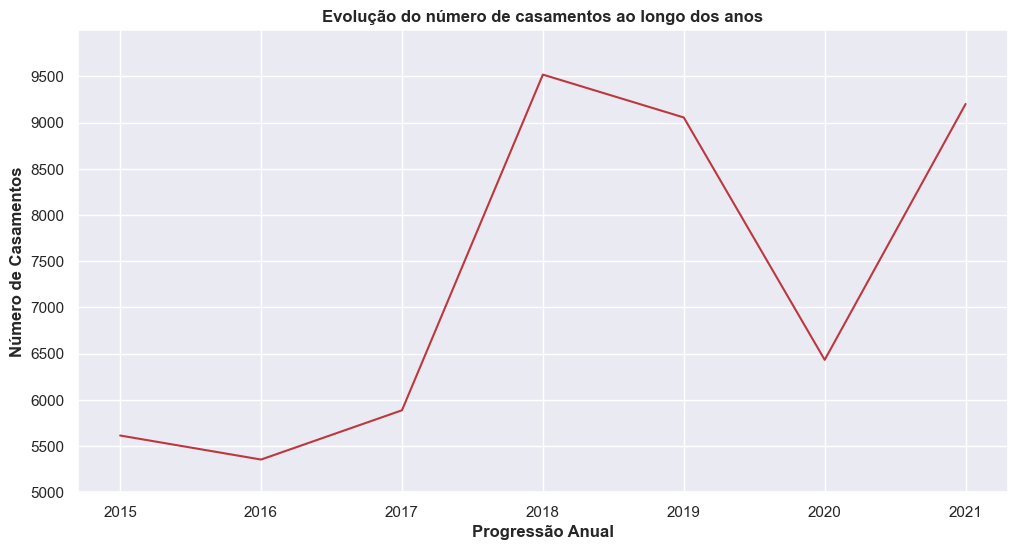

In [ ]:
evolucao_geral = dados_principais.groupby(['ano'])['numero'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.xlabel('Progressão Anual', fontweight = 'bold')
plt.ylabel('Número de Casamentos', fontweight = 'bold')
plt.title('Evolução do número de casamentos ao longo dos anos', fontweight = 'bold')

plt.yticks(range(0, 10000, 500))
plt.ylim(5000, 10000)
plt.xticks()
plt.grid('darkgrid')

sns.lineplot(data = evolucao_geral, x = 'ano', y = 'numero', color = '#BD373E')

Podemos perceber que entre o início de 2015 ao início de 2017 não houveram grandes mudanças na quantidade de casamentos homossexuais que ocorriam dentro de todo o continente brasileiro. Contudo, ao decorrer do ano de 2017 houve uma grande crescente que conseguiu alcançar o seu pico aproximadamente em 9500 casamentos no início de 2018.

Contudo, após a progressão de 2018 tivemos uma leve queda de valores chegando a aproximadamente 9000 casamentos homossexuais no início do ano de 2019.

Que deu prosseguimento com uma grande queda do número de casamentos entre o início do ano de 2019 e inicio de 2020, e nesse caso possuímos a resposta de que foi na época em que a COVID-19 se instaurou no continente brasileiro assolando as capitais e também todos os eventos presenciais. Contudo, após o andamento de 2020 voltamos a ter novamente uma crescente no número de casamentos conseguindo passar da casa dos 9000 casamentos.

Contudo, estes valores possuem uma base continental. Ou seja, eles não consideram os valores unitários de cada um dos estados e sua "contribuição" para o aumento dos casamentos homoafetivos. E para entender um pouco disto, realizaremos um filtro para buscar os estados num contexto geral ao passar dos anos. Visando encontrar dados que nos permitam dizer aquele que contribuiu com um maior número de casamentos, e aqueles que contribuiram com um menor número.

C:\Users\runer\AppData\Local\Temp\ipykernel_10308\4283226893.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  visualizar.set_xticklabels(visualizar.get_xticklabels(), rotation=90, ha='center')


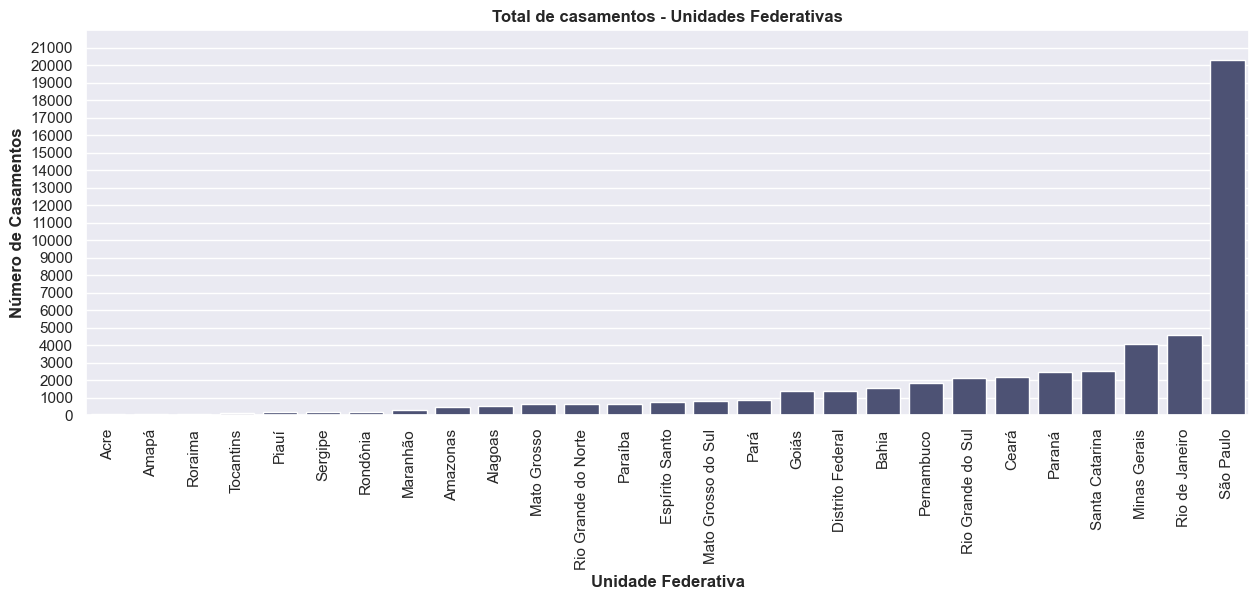

In [ ]:
evolucao_estatal = dados_principais.groupby(['uf'])['numero'].sum().reset_index()
evolucao_estatal_crescente = evolucao_estatal.sort_values(by = 'numero')

plt.figure(figsize=(15, 5))
plt.ylim(0, 22000)
plt.yticks(range(0, 21500, 1000))
plt.grid('darkgrid')

plt.xlabel('Unidade Federativa', fontweight = 'bold')
plt.ylabel('Número de Casamentos', fontweight = 'bold')
plt.title('Total de casamentos - Unidades Federativas', fontweight = 'bold')

visualizar = sns.barplot(data=evolucao_estatal_crescente, x='uf', y='numero', errorbar=('ci', 0), color= '#464D7A')
visualizar.set_xticklabels(visualizar.get_xticklabels(), rotation=90, ha='center')

plt.show()

In [ ]:
tres_maiores = evolucao_estatal_crescente.nlargest(3, 'numero')
tres_maiores

,uf,numero
25,São Paulo,20285
20,Rio de Janeiro,4584
12,Minas Gerais,4087


Com os valores exibidos acima podemos ver que os estados brasileiros que mais tiveram casamentos homossexuais ao longo de todos esses anos foi:
```
1 º São Paulo : Com um total de 20.285 casamentos registrados.
2 º Rio de Janeiro : Com um total de 4.584 casamentos registrados.
3 º Minas Gerais : Com um total de 4.087 casamentos registrados.
```

Enquanto os estados [Acre, Amapá, Roraima e Tocantins] se mostram como os estados com o menor número de casamentos ao longo de todos estes anos. E será com estes dados que haverá a possibilidade de trazer os aprendizados de máquina para que possamos prever os possíveis números de casamentos para os anos de 2022 e 2023 para os [3] estados citados como aqueles que possuiram o maior número de casamentos homossexuais ao longo dos anos de 2015 e 2021. Contudo, para isto será necessário a filtragem destes três valores.

In [ ]:
extrair = ['São Paulo', 'Rio de Janeiro', 'Minas Gerais']
preparar_dados = dados_principais[dados_principais['uf'].isin(extrair)]
preparar_dados = preparar_dados.drop(columns=['mes', 'genero']).reset_index(drop=True)
preparar_dados.groupby(['uf', 'ano'])['numero'].sum().reset_index()

,uf,ano,numero
0,Minas Gerais,2015,378
1,Minas Gerais,2016,393
2,Minas Gerais,2017,447
3,Minas Gerais,2018,737
4,Minas Gerais,2019,815
5,Minas Gerais,2020,502
6,Minas Gerais,2021,815
7,Rio de Janeiro,2015,612
8,Rio de Janeiro,2016,578
9,Rio de Janeiro,2017,508


In [ ]:
dados_finais_SP = preparar_dados.groupby(['ano', 'uf'])['numero'].sum().reset_index()
dados_finais_RJ = preparar_dados.groupby(['ano', 'uf'])['numero'].sum().reset_index()
dados_finais_MG = preparar_dados.groupby(['ano', 'uf'])['numero'].sum().reset_index()

dados_finais_SP = dados_finais_SP[dados_finais_SP['uf'] == 'São Paulo']
dados_finais_RJ = dados_finais_RJ[dados_finais_RJ['uf'] == 'Rio de Janeiro']
dados_finais_MG = dados_finais_MG[dados_finais_MG['uf'] == 'Minas Gerais']



dados_finais_SP = dados_finais_SP.set_index('ano')
dados_finais_RJ = dados_finais_RJ.set_index('ano')
dados_finais_MG = dados_finais_MG.set_index('ano')

Após realizarmos alguns filtros temos finalmente os nossos dados em seu formato final para trabalhar com as previsões, mas antes disto é necessário uma explicação formal do que foi feito para que este resultado fosse de fato alcançado.

Para a primeira parte foi necessário criar uma lista para a extração dos estados específicos, a variável que reteu esta lista foi nomeada de `extrair`, após isto passamos para a extração dos dados de fato criando uma outra variável chamada de `preparar_dados`da qual teria como função trazer os dados principais do nosso **DATAFRAME** que estão presentes em uma outra variável chamada ``dados_principais``.

Com isto feito, realizamos a extração das unidades federativas que estão dentro da lista que criamos anteriormente, e então realizamos a remoção das colunas que não nos servirão para a realização do aprendizado de máquina, neste caso houve a remoção das colunas `mês e gênero` para que então finalmente pudessemos agrupar os valores por `uf e ano`, e então isto permitisse que trouxessemos o valor dos números somados de cada ano que passou destes estados.

E então chegamos para as variáveis:
`
dados_finais_SP
dados_finais_RJ
dados_finais_MG
`

Que filtram mais ainda os dados para que cada uma das variáveis contenham apenas a sua unidade federativa designada com seus números de casamentos anuais, e então finalmente realizamos a última função que é passar o ano para nosso index. Para que assim possamos trabalhar com ARIMA. Pois não sereremos capazes de trabalhar com DATETIME pelo fato do Pandas apenas aceitar como Datetime formatos `%Y, %m, %d`.

In [ ]:
modelo_arima_RJ = ARIMA(dados_finais_RJ['numero'], order=(1, 1, 1)) #Parâmetros P, D, Q
treinamento_RJ = modelo_arima_RJ.fit()

previsao_RJ = treinamento_RJ.forecast(steps = 2)
previsao_RJ

C:\Users\runer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\runer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\runer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\runer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCac

7    638.361990
8    653.907221
Name: predicted_mean, dtype: float64

In [ ]:
modelo_arima_MG = ARIMA(dados_finais_MG['numero'], order=(1, 1, 1))
treinamento_MG = modelo_arima_MG.fit()

previsao_MG = treinamento_MG.forecast(steps = 2)
previsao_MG

C:\Users\runer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\runer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\runer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\runer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCac

7    722.706069
8    729.370620
Name: predicted_mean, dtype: float64

In [ ]:
modelo_arima_SP = ARIMA(dados_finais_SP['numero'], order=(1, 1, 1))
treinamento_SP = modelo_arima_SP.fit()

previsao_SP = treinamento_SP.forecast(steps = 2)
previsao_SP

C:\Users\runer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\runer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\runer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\runer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCac

7    3483.334440
8    3406.135674
Name: predicted_mean, dtype: float64

Após as previsões serem realizadas criaremos um novo **DATAFRAME**, este conterá todas as informações de cada uma das previsões e após isto será acoplado aos dados originais.
Permitindo assim a visualização gráfica do total de casamentos previstos para os dois anos seguintes do solicitado.

In [ ]:
anos_previsao = [2022, 2023, 2022, 2023, 2022, 2023]
previsoes = np.concatenate([previsao_MG, previsao_SP, previsao_RJ])

dados_previsao = pd.DataFrame({
    'ano' : anos_previsao,
    'uf' : ['Minas Gerais', 'Minas Gerais', 'São Paulo', 'São Paulo', 'Rio de Janeiro', 'Rio de Janeiro'],
    'numero' : previsoes})

dados_previsao = dados_previsao.round(2)
dados_previsao = dados_previsao.set_index('ano')

dados_concatenados = pd.concat([dados_finais_MG, dados_finais_RJ, dados_finais_SP, dados_previsao]).reset_index()

Realizei uma verificação para ver se ficou algum digito nulo no processo. E após isto partiremos então para a criação de um gráfico que conterá os dados da previsão.

In [ ]:
x = dados_concatenados['ano'].unique()
x

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [ ]:
dado_final = dados_concatenados.sort_values(by= 'uf')
dado_final = dado_final.groupby(['uf', 'ano'])['numero'].sum().reset_index()
dado_final

,uf,ano,numero
0,Minas Gerais,2015,378.00
1,Minas Gerais,2016,393.00
2,Minas Gerais,2017,447.00
3,Minas Gerais,2018,737.00
4,Minas Gerais,2019,815.00
5,Minas Gerais,2020,502.00
6,Minas Gerais,2021,815.00
7,Minas Gerais,2022,722.71
8,Minas Gerais,2023,729.37
9,Rio de Janeiro,2015,612.00


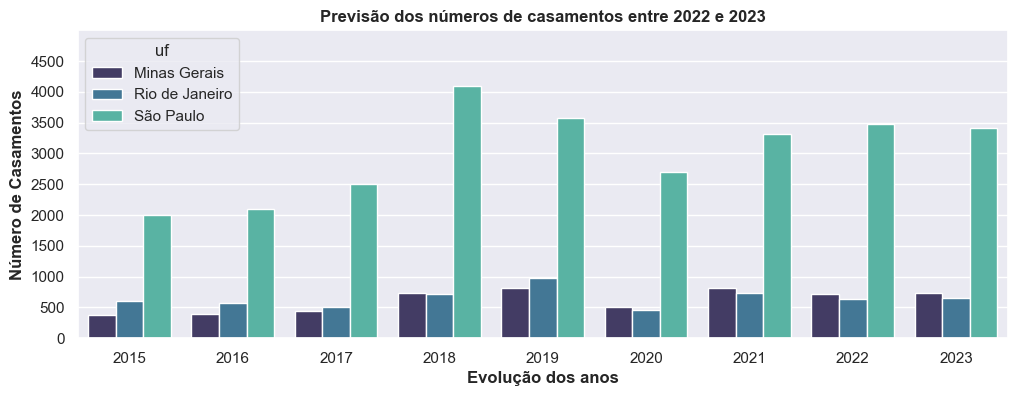

In [ ]:
sns.set_theme(style = 'darkgrid')

plt.figure(figsize=(12, 4))
plt.yticks(range(0, 5000, 500))
plt.ylim(0, 5000)

plt.xlabel('Evolução dos anos', fontweight = 'bold')
plt.ylabel('Número de Casamentos', fontweight = 'bold')
plt.title('Previsão dos números de casamentos entre 2022 e 2023', fontweight = 'bold')

ax = sns.barplot(data = dado_final, x = 'ano', y = 'numero', hue = 'uf', palette= 'mako', errorbar=('ci', 0),)
plt.show()

Após a filtragem dos dados vem o momento em que geramos o gráfico para dispormos esses dados de maneira visualizável. Contudo, podemos perceber que não houve aumentos significativos entre os anos de 2020 e 2023 e temos uma explicação bem sucinta referente a isto.

De acordo com rádio senado:
acesso em: `https://www12.senado.leg.br/radio/1/noticia/2022/02/23/dois-anos-do-primeiro-caso-de-coronavirus-no-brasil`

`" - O primeiro caso confirmado de pessoa com o novo coronavírus no Brasil ocorreu em 26 de fevereiro de 2020."`

E este foi um dos agravantes pelo qual fez o número de casamentos no estado brasileiro diminuir de maneira considerável do ano de 2019 ao de 2020. Então com a progressão e passagem do ano de 2020, ao chegarmos no ano de 2021 começamos a obter um aumento por conta das liberações que o Estado Brasileiro estava realizando, e também das flexibilizações do mesmo para realizar eventos de maneira on-line ou por agendamento, diminuindo aglomerações. E finalmente chegamos em 2023 que acabou mantendo os números similares ao seu ano anterior, não tendo ainda um aumento considerável nos dados. O que permite-nos observar que talvez o número dos casamentos permaneça com um tanto estagnado nestes anos seguintes.

Após a realização da previsão podemos realizar um filtro onde obteremos a distribuição da preferência do casamento em determinado mês por cada um dos gêneros.

<Axes: xlabel='mes', ylabel='numero'>

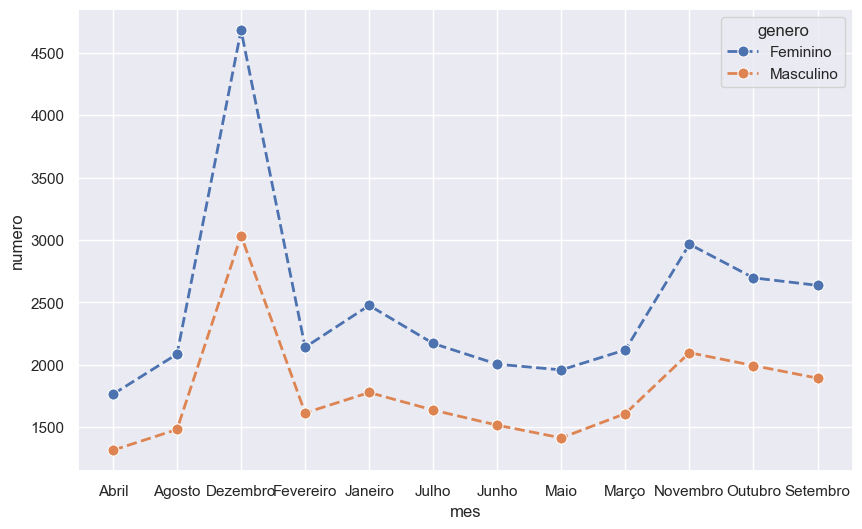

In [ ]:
distribuicao_mes_genero = dados_principais.groupby(['mes', 'genero'])['numero'].sum().reset_index()
distribuicao_mes_genero
plt.figure(figsize=(10,6))
sns.lineplot(data = distribuicao_mes_genero, x = 'mes', y = 'numero', hue= 'genero', linestyle = '--', linewidth= 2, marker = 'o', markersize = 8)

Com o gráfico acima podemos observar que ambos os gêneros possuem uma tendência de buscar realizar casamentos nos meses de dezembro, novembro e janeiro respectivamente em ordem de busca. E também é extremamente perceptível a quantidade de casamentos realizados por pessoas do gênero feminino contra a quantia de casamentos realizados por pessoas do gênero masculino, pois podemos ver que há uma discrepância as vezes gigantesca, as vezes considerável entre a quantia de casamentos realizados ao longo de todos estes anos.

Logo é necessário buscar informações das quais poderão refletir neste conteúdo, sobre o porquê de pessoas do gênero masculino buscarem menos casamentos que o público feminino.

*Finalizo este trabalho agradecendo pela a oportunidade de participação para confecção deste projeto com os dados que foram oferecidos, e espero poder me juntar a futuros projetos. Graças a este projeto pude me desafiar a aprender novos softwares e entender o funcionamento de novas bibliotecas, o que me trouxe um conhecimento muuuuito vasto nas demais precitadas.*

**Um bom dia!**